# **BA810: Supervised Machine Learning Group Project**

#### **Group 5:** Alexander Heger, Arushi Pathik, Harshil Thakkar, Hao-Yu Chang

## **NYC Real Estate Sale Price Prediction**

### Problem Statement

**Introduction:** Through this project, we aim to implement multiple supervised machine learning techniques to train our model, and further accurately predict *residential real estate prices* in New York City.

**Dataset:** Our dataset, which we sourced from __[data.world](https://data.world/dataquest/nyc-property-sales-data/workspace/file?filename=NYC_property_sales.csv)__, includes 38,177 records of individual commerical and residential property sales scraped from the __[New York City Department of Finance](https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)__.

**Motivation:** According to the National Association of Realtors, the total market worth of real estate in the United States tops $43 trillion. Therefore, we want to take a deep dive into the real estate market pertaining to New York City and create a model relevant to the same field. Our developed model could further be used to assess the feasibility of future real estate prices in New York City, either by real estate agencies, mortgage lenders, or private entities who might be looking to buy/ sell property. Or, it could also be adapted for use in different locations to help users tap into other potential markets.

Therefore, we are highly motivated to take this project further and help understand the real estate industry in New York City.

<hr>

### Table of Contents

1. Data Importing & Exploration

2. Data Cleaning & Pre-processing

3. Data Scoping

4. Model Development and Implementation

5. Hyper Tuning of Hist Gradient Boosting Regressor

6. Final Model Evaluation

7. Conclusion

<hr>

## **1. Data Importing & Exploration**

In [ ]:
# Importing raw data from a shared google drive
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')
folder_data = '/content/drive/SharedDrives/BA810_Team5_Drive/'
data = pd.read_csv("/content/drive/Shareddrives/BA810_Team5_Drive/NYC_property_sales.csv")
data.head()   #Frist glance at the dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Bronx,Bathgate,01 One Family Dwellings,1,3030,62,A1,4463 Park Avenue,NaN,10457.00,1,0,1,1578,1470,1899,1,A1,455000,2018-11-28T00:00:00Z
1,Bronx,Bathgate,01 One Family Dwellings,1,3030,70,A1,4445 Park Avenue,NaN,10457.00,1,0,1,1694,1497,1899,1,A1,388500,2019-07-23T00:00:00Z
2,Bronx,Bathgate,01 One Family Dwellings,1,3039,63,A1,469 E 185th St,NaN,10458.00,1,0,1,1650,1296,1910,1,A1,419000,2018-12-20T00:00:00Z
3,Bronx,Bathgate,01 One Family Dwellings,1,3043,55,A1,1948 Bathgate Avenue,NaN,10457.00,1,0,1,2356,2047,1901,1,A1,470000,2019-03-08T00:00:00Z
4,Bronx,Bathgate,01 One Family Dwellings,1,3046,35,A1,2083 Bathgate Avenue,NaN,10457.00,1,0,1,2050,1560,1899,1,A1,445000,2018-12-17T00:00:00Z


In [ ]:
# Explore dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38177 entries, 0 to 38176
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         38177 non-null  object 
 1   neighborhood                    38177 non-null  object 
 2   building_class_category         38177 non-null  object 
 3   tax_class_at_present            38177 non-null  object 
 4   block                           38177 non-null  int64  
 5   lot                             38177 non-null  int64  
 6   building_class_at_present       38177 non-null  object 
 7   address                         38177 non-null  object 
 8   apartment_number                12068 non-null  object 
 9   zip_code                        38144 non-null  float64
 10  residential_units               38177 non-null  int64  
 11  commercial_units                38177 non-null  int64  
 12  total_units                     

The raw data is characterized by 19 columns.  Their descriptions from the Department of Finance are explained in detail __[here](https://www.nyc.gov/site/finance/taxes/glossary-property-sales.page)__.

`borough` - The named borough in which the property resides

`neighborhood` - The neighborhood in which the property resides

`building_class_category` - A desciptor assigned by the Department of Finance to group properties by tax class

`tax_class_at_present` - The current tax class of the property

`block` - The sub-division of the borough on which real properties are located

`lot` - The subdivision of the tax block that represents the property's unique location

`building_class_at_present` - The present constructive use of the property

`address` - The property address

`apartment_number` - The unit number, if the property is an apartment

`zip_code` - The property's postal code

`residential_units` - The number of residential units at the listed property

`commercial_units` - The number of commercial units at the listed property

`total_units` - The total number of units at the listed property

`land_square_feet` - The land area of the property listed in square feet

`gross_square_feet` - The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building

`year_built` - The year the property was constructed

`tax_class_at_time_of_sale` - The property's tax class at time of sale

`building_class_at_time_of_sale` - The property's building class at time of sale

`sale_price` - The price paid for the property, __our target variable__

`sale_date` - The date the property sold

In [ ]:
# Distribution of data by borough
data.borough.value_counts()

Queens           11955
Brooklyn         10888
Manhattan         6572
Staten Island     4837
Bronx             3925
Name: borough, dtype: int64

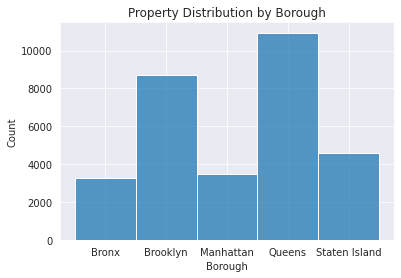

In [ ]:
# Histogram of property count by borough
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data.borough);
plt.xlabel('Borough');
plt.title('Property Distribution by Borough');

As seen from the plot above, New York City has 5 boroughs.  Of those, most of this dataset resides in Queens.

In [ ]:
# Distribution of data by building_class
data.building_class_category.value_counts()

01 One Family Dwellings                       11755
02 Two Family Dwellings                        8797
13 Condos - Elevator Apartments                8096
03 Three Family Dwellings                      2158
07 Rentals - Walkup Apartments                 1424
04 Tax Class 1 Condos                          1068
15 Condos - 2-10 Unit Residential               965
12 Condos - Walkup Apartments                   704
22 Store Buildings                              526
44 Condo Parking                                512
14 Rentals - 4-10 Unit                          296
43 Condo Office Buildings                       251
47 Condo Non-Business Storage                   240
21 Office Buildings                             229
08 Rentals - Elevator Apartments                213
30 Warehouses                                   182
29 Commercial Garages                           139
27 Factories                                    118
46 Condo Store Buildings                         85
37 Religious

There are 37 different building classes represented in the dataset, spanning residential buildings to commerical structures, to religious facilities.  We will focus on residential properties for the purpose of our analysis.

In [ ]:
# Sale price description
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data.sale_price.describe()

count        38177.00
mean       2431341.85
std       18630258.99
min          10040.00
25%         525000.00
50%         760000.00
75%        1280000.00
max     2155000000.00
Name: sale_price, dtype: float64

The mean sale price of our housing dataset is \$2,431,341.85.  The median is \$760,000.00.  This indicates strong *right-skewness* in the dataset.  The standard deviation is also incredibly high at \$18,630,258.99, showing high variance as noted by the range of property sale prices from \$10,040.00 to \$2,155,000,000.00, which we think our outliers (analyzed and dealt with further down our project.  We will need to control for this variance by removing outlier records from `sale_price`, and by normalizing it in our model.

In [ ]:
# Gross square feet description
data.gross_square_feet.describe()

count     38177.00
mean       3543.14
std       22500.52
min           1.00
25%        1083.00
50%        1552.00
75%        2334.00
max     1741458.00
Name: gross_square_feet, dtype: float64

The distribution for `gross_square_feet` is similar to that of `sale_price` in that it is right skewed and with high variance.  This perhaps suggests a linear relationship between square feet and sale price of a property.

In [ ]:
# Correlation between price and gross square feet
price_sqft = data[[ 'gross_square_feet', 'sale_price']]
price_sqft.corr()

,gross_square_feet,sale_price
gross_square_feet,1.00,0.60
sale_price,0.60,1.00


In fact, when we look at linear correlation between gross_square_feet and sale_price, there is a moderate positive correlation (0.60). Hence, our initial assumption of them behaving the same proved to be right.



---



##**2. Data Cleaning**

**Dropping irrelevant columns**

Considering first that only 12,068 properties in our dataset had a value for apartment_number, we dropped this column along with duplicative columns that characterized a building's tax class and square footage.  For these latter characterizations, we will use `tax_class_at_time_of_sale` and `gross_square_feet`.

Therefore, we decided to drop `tax_class_at_present`, `building_class_at_present`, `building_class_at_time_of_sale` since they provide no in-depth insight into our end goal analysis of price prediction.

In [ ]:
data.drop(['apartment_number', 'building_class_category', 'tax_class_at_present', 
           'building_class_at_present', 'building_class_at_time_of_sale',
           'land_square_feet'], axis=1, inplace=True)
data.head()

,borough,neighborhood,block,lot,address,zip_code,residential_units,commercial_units,total_units,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,sale_date
0,Bronx,Bathgate,3030,62,4463 Park Avenue,10457.00,1,0,1,1470,1899,1,455000,2018-11-28T00:00:00Z
1,Bronx,Bathgate,3030,70,4445 Park Avenue,10457.00,1,0,1,1497,1899,1,388500,2019-07-23T00:00:00Z
2,Bronx,Bathgate,3039,63,469 E 185th St,10458.00,1,0,1,1296,1910,1,419000,2018-12-20T00:00:00Z
3,Bronx,Bathgate,3043,55,1948 Bathgate Avenue,10457.00,1,0,1,2047,1901,1,470000,2019-03-08T00:00:00Z
4,Bronx,Bathgate,3046,35,2083 Bathgate Avenue,10457.00,1,0,1,1560,1899,1,445000,2018-12-17T00:00:00Z


**Cleaning `year_built`**

2,572 properties show a `year_built` equal to 0, and one property shows a `year_built` of 1030, which is infeasible.  We will remove these values and impute the year built in our machine learning pipeline.

In [ ]:
print(data[data['year_built'] == 0].year_built.value_counts())
print(data[data['year_built'] == 1030].year_built.value_counts())

0    2572
Name: year_built, dtype: int64
1030    1
Name: year_built, dtype: int64


In [ ]:
data.year_built.replace(0, np.NaN, inplace=True)
data.year_built.replace(1030, np.NaN, inplace=True)
data.year_built.describe()

count   35604.00
mean     1953.43
std        38.08
min      1800.00
25%      1924.00
50%      1945.00
75%      1989.00
max      2020.00
Name: year_built, dtype: float64

We elected to remove instances of non-residential properties to allow our model to hone in on residential property prices alone.  This involved finding and removing all records where `commercial_units` was not equal to 0.  We could then remove this column and the `total_units` column.

In [ ]:
data = data[(data['commercial_units'] == 0)]
data.drop(['commercial_units', 'total_units'], axis=1, inplace=True)
data.shape

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(35684, 12)

From here we also want to remove outliers from `sale_price` and `gross_square_feet` to ensure that we are training our model on realistic records of residential property sales. We define outliers at those points beyond one and a half times the interquartile range of the data set.

In [ ]:
sp_q3, sp_q1 = np.percentile(data.sale_price, [75, 25])
sp_iqr = sp_q3 - sp_q1
sp_upper_bound = sp_q3 + 1.5 * sp_iqr
sp_lower_bound = sp_q1 - 1.5 * sp_iqr

print(sp_upper_bound)
print(sp_lower_bound)

2177500.0
-482500.0


In [ ]:
data = data[data.sale_price < sp_upper_bound]
data.shape

(31859, 12)

In [ ]:
sf_q3, sf_q1 = np.percentile(data.gross_square_feet, [75, 25])
sf_iqr = sf_q3 - sf_q1
sf_upper_bound = sf_q3 + 1.5 * sf_iqr
sf_lower_bound = sf_q1 - 1.5 * sf_iqr

print(sf_upper_bound)
print(sf_lower_bound)

3609.0
-543.0


In [ ]:
data = data[data.gross_square_feet < sf_upper_bound]
data.shape

(30976, 12)

Controlling for these outliers still leaves us with over 30,000 records from which our model can learn!



---



##**3. Data Scoping**

In this next phase of the project, we further explored the dataset. 

**Google's Geocoding API: Address alteration**

We considered all the categorical variables related to location: `borough`, `neighborhood`, `block`, `lot`, `address`, and `zip_code`.  For the purpose of machine learning, this seemed like too many categorizations of each record all to determine the property's location.  Therefore, we decided to convert each property address into a latitude and longitude value from *Google's Geocoding API.*

In order to use the Geocoding API, we needed to prepare our addresses in such a way that the API could interpret our request and respond with the appropriate latitude and longitude values.  Once we removed missing values for `zip_code`, this format was stored in the `full_address` column.

In [ ]:
data = data[~data['zip_code'].isnull()]

In [ ]:
data.zip_code.isna().sum()

0

In [ ]:
data = data.astype({'zip_code': int})

In [ ]:
data['full_address'] = data['address'].str.upper() + ', ' + data['borough'].str.upper() + ', ' + 'NY' + ', ' + data['zip_code'].astype(str)
data.head()

,borough,neighborhood,block,lot,address,zip_code,residential_units,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,sale_date,full_address
0,Bronx,Bathgate,3030,62,4463 Park Avenue,10457,1,1470,1899.00,1,455000,2018-11-28T00:00:00Z,"4463 PARK AVENUE, BRONX, NY, 10457"
1,Bronx,Bathgate,3030,70,4445 Park Avenue,10457,1,1497,1899.00,1,388500,2019-07-23T00:00:00Z,"4445 PARK AVENUE, BRONX, NY, 10457"
2,Bronx,Bathgate,3039,63,469 E 185th St,10458,1,1296,1910.00,1,419000,2018-12-20T00:00:00Z,"469 E 185TH ST, BRONX, NY, 10458"
3,Bronx,Bathgate,3043,55,1948 Bathgate Avenue,10457,1,2047,1901.00,1,470000,2019-03-08T00:00:00Z,"1948 BATHGATE AVENUE, BRONX, NY, 10457"
4,Bronx,Bathgate,3046,35,2083 Bathgate Avenue,10457,1,1560,1899.00,1,445000,2018-12-17T00:00:00Z,"2083 BATHGATE AVENUE, BRONX, NY, 10457"


Then, we sent our full addresses to the API.  We've removed the API key and commented out the cell in order to prevent re-running the code.

In [ ]:
# import requests
# import urllib.parse

# api_key = 'INSERT API KEY HERE'
# for i, row in data.iterrows():
#     address = str(data.at[i,'full_address'])  
#     encoded_address = urllib.parse.quote(address)
#     response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address='+encoded_address+'&key='+api_key)
#     resp_json = response.json()
#     lat = (resp_json['results'][0]['geometry']['location']['lat'])
#     lng = (resp_json['results'][0]['geometry']['location']['lng'])

#     data.at[i,'lat'] = lat
#     data.at[i,'lng'] = lng

# data.to_csv('/content/drive/Shareddrives/BA810_Team5_Drive/NYC_sales_lat_long.csv', index=False)

This yielded the following CSV file, which we alias as 'residences'. When plotted, the `lat` and `lng` column values produce a 2D rendering of New York City.

In [ ]:
residences = pd.read_csv("/content/drive/Shareddrives/BA810_Team5_Drive/NYC_sales_lat_long.csv")
residences.head()

,borough,neighborhood,block,lot,address,zip_code,residential_units,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,sale_date,full_address,lat,lng
0,Bronx,Bathgate,3030,62,4463 Park Avenue,10457,1,1470,1899.00,1,455000,2018-11-28T00:00:00Z,"4463 PARK AVENUE, BRONX, NY, 10457",40.85,-73.90
1,Bronx,Bathgate,3030,70,4445 Park Avenue,10457,1,1497,1899.00,1,388500,2019-07-23T00:00:00Z,"4445 PARK AVENUE, BRONX, NY, 10457",40.85,-73.90
2,Bronx,Bathgate,3039,63,469 E 185th St,10458,1,1296,1910.00,1,419000,2018-12-20T00:00:00Z,"469 E 185TH ST, BRONX, NY, 10458",40.86,-73.89
3,Bronx,Bathgate,3043,55,1948 Bathgate Avenue,10457,1,2047,1901.00,1,470000,2019-03-08T00:00:00Z,"1948 BATHGATE AVENUE, BRONX, NY, 10457",40.85,-73.90
4,Bronx,Bathgate,3046,35,2083 Bathgate Avenue,10457,1,1560,1899.00,1,445000,2018-12-17T00:00:00Z,"2083 BATHGATE AVENUE, BRONX, NY, 10457",40.85,-73.90


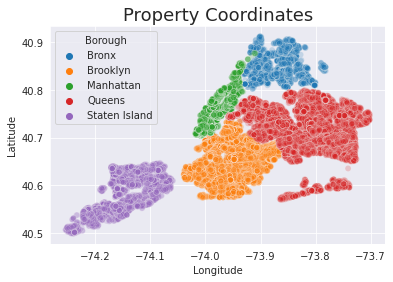

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x='lng', y='lat', hue='borough', data=residences, alpha=0.2);
plt.legend(title="Borough");
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('Property Coordinates', {'fontsize': 18});

From here, we could drop the redundant categorical variables for location. 

In [ ]:
residences.drop(['neighborhood', 'block', 'lot', 'address', 
                 'zip_code', 'full_address'],
         axis=1, inplace=True)
residences.shape

(30971, 9)

In [ ]:
residences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   borough                    30971 non-null  object 
 1   residential_units          30971 non-null  int64  
 2   gross_square_feet          30971 non-null  int64  
 3   year_built                 28885 non-null  float64
 4   tax_class_at_time_of_sale  30971 non-null  int64  
 5   sale_price                 30971 non-null  int64  
 6   sale_date                  30971 non-null  object 
 7   lat                        30971 non-null  float64
 8   lng                        30971 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.1+ MB


Our remaining categorical variables are `borough` and `tax_class_at_time_of_sale`, and our numeric variables are `residential_units`, `gross_square_feet`, `year_built`, `lat`, and `lng`.  `sale_price`, our dependent variable, is also numeric.  

We next convert `sale_date` to a categorical variable by grouping records into quarters.  If we had left date in its original format, which was datetime format, our OneHotEncoding would have made separate features for each day that a house was sold.

In [ ]:
residences['sale_date'] = pd.PeriodIndex(pd.to_datetime(residences['sale_date']), freq = 'Q')
residences['sale_date']

0        2018Q4
1        2019Q3
2        2018Q4
3        2019Q1
4        2018Q4
          ...  
30966    2019Q1
30967    2019Q1
30968    2019Q3
30969    2019Q3
30970    2019Q3
Name: sale_date, Length: 30971, dtype: period[Q-DEC]

In [ ]:
residences = residences.astype({'borough': 'category', 
                                'tax_class_at_time_of_sale': 'category', 
                                'sale_date': 'category'})

residences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   borough                    30971 non-null  category
 1   residential_units          30971 non-null  int64   
 2   gross_square_feet          30971 non-null  int64   
 3   year_built                 28885 non-null  float64 
 4   tax_class_at_time_of_sale  30971 non-null  category
 5   sale_price                 30971 non-null  int64   
 6   sale_date                  30971 non-null  category
 7   lat                        30971 non-null  float64 
 8   lng                        30971 non-null  float64 
dtypes: category(3), float64(3), int64(3)
memory usage: 1.5 MB


In [ ]:
residences.isna().sum()

borough                         0
residential_units               0
gross_square_feet               0
year_built                   2086
tax_class_at_time_of_sale       0
sale_price                      0
sale_date                       0
lat                             0
lng                             0
dtype: int64

Again, we'll export our dataset to a CSV for transportability and model testing across multiple notebooks.

In [ ]:
# residences.to_csv('/content/drive/Shareddrives/BA810_Team5_Drive/residences_clean.csv', index=False)



---



## **4. Model Development and Implementation**

To start our model development, we first take a look at our variables with regard to collinearity using Seaborn's pairplot and Python's correlation method.

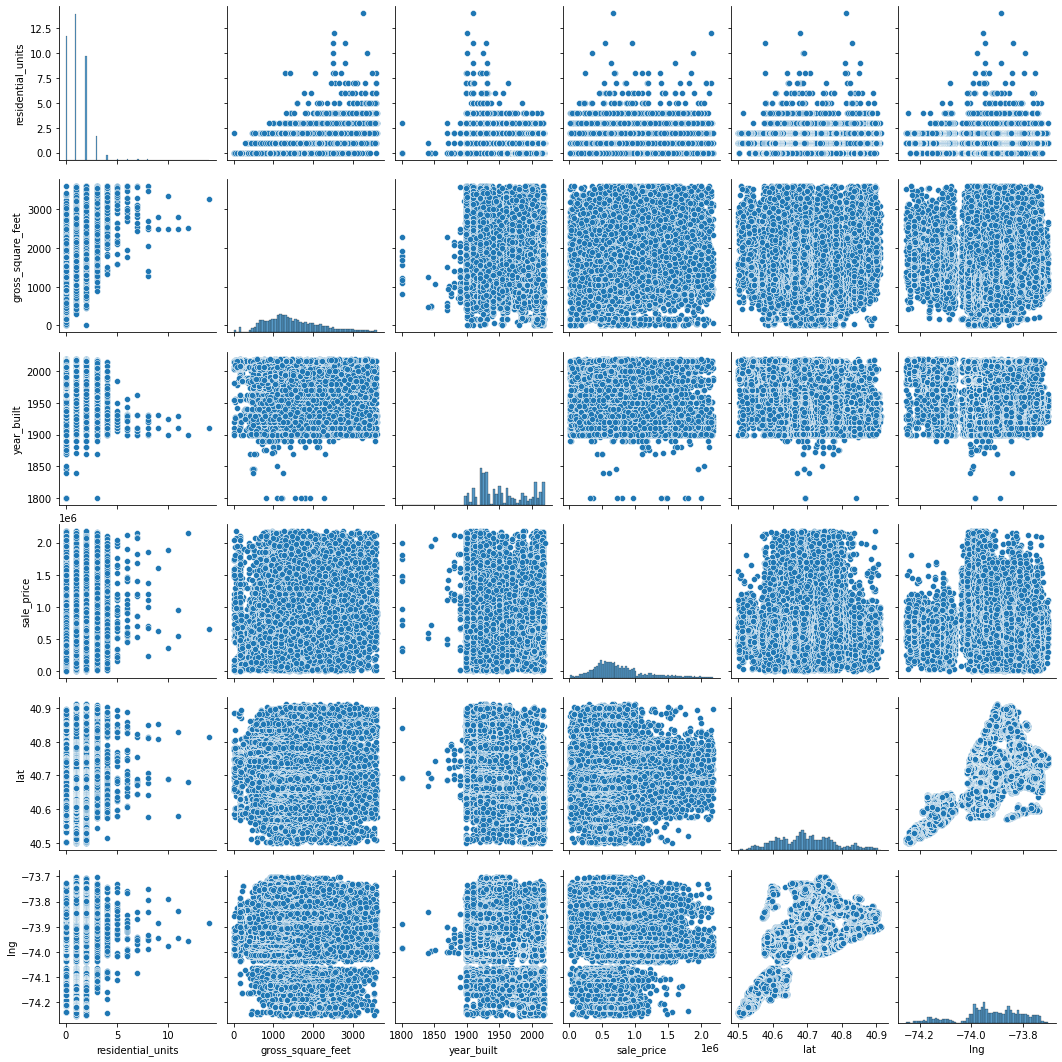

In [ ]:
sns.pairplot(residences)

In [ ]:
residences.corr()

,residential_units,gross_square_feet,year_built,sale_price,lat,lng
residential_units,1.00,0.74,-0.43,0.02,-0.05,0.13
gross_square_feet,0.74,1.00,-0.28,0.22,-0.04,0.06
year_built,-0.43,-0.28,1.00,0.03,-0.10,-0.25
sale_price,0.02,0.22,0.03,1.00,0.07,-0.08
lat,-0.05,-0.04,-0.10,0.07,1.00,0.54
lng,0.13,0.06,-0.25,-0.08,0.54,1.00


Next, we run a linear regression on our dataset in order to test the statistical significance of each predictor.

In [ ]:
import statsmodels.formula.api as smf

res_lin = smf.ols('sale_price ~ residential_units + gross_square_feet + year_built + lat + lng + C(tax_class_at_time_of_sale) + C(borough)', residences).fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     1802.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:40:58   Log-Likelihood:            -4.0596e+05
No. Observations:               28885   AIC:                         8.120e+05
Df Residuals:                   28873   BIC:                         8.121e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

**Dataset relevance**

From the data above, we can say that all the columns in our dataset have statistical significance when it comes to our end predictor (property sale price). A low p-value means a high feature signifance, which is perfectly in line with our analysis and our chosen dataset and attributes. 

It is seen that almost all the columns have 0.00 p-value, thus indicating very high significance and extreme relevance to the dataset.

__Decision on Taking Log of Sale Price__

We elect to not take the log of `sale_price` considering that with outliers removed, our natural `sale_price` values take on a more normal distribution than their log counterparts.

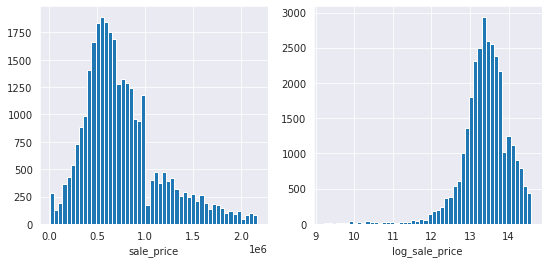

In [ ]:
residences['log_sale_price'] = np.log(residences['sale_price'])

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
residences["sale_price"].hist(ax=axs[0], bins=50)
residences["log_sale_price"].hist(ax=axs[1], bins=50)
axs[0].set_xlabel("sale_price")
axs[1].set_xlabel("log_sale_price")

plt.show()

In [ ]:
residences.drop('log_sale_price', axis=1, inplace=True)

### Train-Test Split

In [ ]:
#split the data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(residences, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(24776, 6195)

In [ ]:
X_train = train_set.drop("sale_price", axis=1)  # dropping sale price for selecting the model
y_train = train_set["sale_price"].copy()  # using sale price for testing the model

### Pipeline Development

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

set_config(display='diagram')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False)) 
    ])


num_attribs = ['residential_units', 'gross_square_feet', 'year_built', 'lat', 'lng']
cat_attribs = ['borough', 'tax_class_at_time_of_sale']

SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

preprocess_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
    ])
preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['residential_units', 'gross_square_feet',
                                  'year_built', 'lat', 'lng']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 ['borough', 'tax_class_at_time_of_sale'])])

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = make_pipeline(preprocess_pipeline, LinearRegression())
%timeit (lin_reg.fit(X_train, y_train))

99.1 ms ± 4.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
housing_predictions = lin_reg.predict(X_train)
housing_predictions[:5].round()

array([689472., 977312., 763296., 975200., 544320.])

In [ ]:
y_train.iloc[:5].values

array([ 699000,  850000,  390000, 1054000,  600000])

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_train, housing_predictions,
                              squared=False)
lin_mse

310579.8343686819

In [ ]:
lin_rmse = -cross_val_score(lin_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
lin_rmse.mean()

310807.38946972

In [ ]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_train, housing_predictions)
lin_r2.mean()

0.41856227789239897

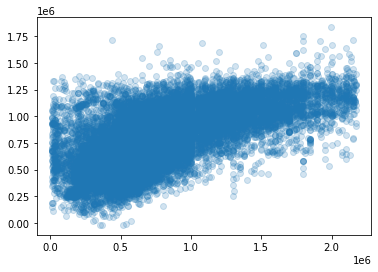

In [ ]:
plt.scatter(y_train, housing_predictions, alpha=0.2)
plt.show()

Linear Regression takes about 99.4ms to fit that data and produces an average root mean squared error (RMSE) of \$310,809.39 between the predicted and true `sale_price`.  The $R^2$ is 0.4186. While computationally efficient, this model is not accurate.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocess_pipeline, DecisionTreeRegressor(random_state=42))
%timeit (tree_reg.fit(X_train, y_train))

238 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
housing_predictions_tree = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, housing_predictions_tree,
                              squared=False)
tree_mse

54116.74838347876

In [ ]:
tree_rmse = -cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
tree_rmse.mean()

316657.06804470805

In [ ]:
tree_r2 = r2_score(y_train, housing_predictions_tree)
tree_r2.mean()

0.9823469364664953

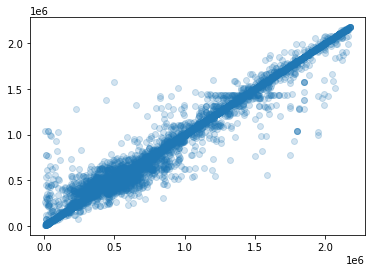

In [ ]:
plt.scatter(y_train, housing_predictions_tree, alpha=0.2)
plt.show()

A decision tree model takes about 243ms to fit the data and produces an RMSE of \$316,657.07 with an $R^2$ of 0.9823.  This seems awfully high, and when we plot y_train versus housing_predictions_tree, we can see a very tight line, which may indicate that this model is overfitting.

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = make_pipeline(preprocess_pipeline,
                           RandomForestRegressor(random_state=42))
%timeit (forest_reg.fit(X_train, y_train))

12 s ± 1.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
housing_predictions_forest = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, housing_predictions_forest,
                              squared=False)
forest_mse

98175.51814032854

In [ ]:
forest_rmse = -cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)
forest_rmse.mean()

238649.19228512188

In [ ]:
forest_r2 = r2_score(y_train, housing_predictions_forest)
forest_r2.mean()

0.9419017434198345

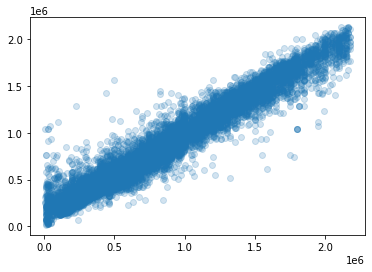

In [ ]:
plt.scatter(y_train, housing_predictions_forest, alpha=0.2)
plt.show()

Random Forest takes about 11.9s to run and produces and RMSE of \$238,649.19 and an $R^2$ of 0.9419%. So far, this is the best model in terms of RMSE, which we care about considering we are trying to estimate price.

###Histogram Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(random_state = 42)
hgb_reg = make_pipeline(preprocess_pipeline, hgb)

%timeit (hgb_reg.fit(X_train, y_train))

769 ms ± 33.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
housing_predictions_hgb = hgb_reg.predict(X_train)
bst_mse = mean_squared_error(y_train, housing_predictions_hgb,
                              squared=False)
bst_mse

216451.36276580684

In [ ]:
#bst.score(t_X, t_y)
hgb_rmse = -cross_val_score(hgb_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)
hgb_rmse.mean()

236315.338296568

In [ ]:
bst_r2 = r2_score(y_train, housing_predictions_hgb)
bst_r2.mean()

0.717591772460078

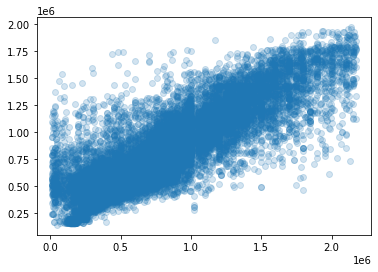

In [ ]:
plt.scatter(y_train, housing_predictions_hgb, alpha=0.2)
plt.show()

Histogram Gradient Boosting takes about 775ms to run and produces an RMSE of \$236,315.34 with an $R^2$ of 0.7176. Since it has the lowest RMSE, we take this model to be the best one for hyperparameter tuning.

### Comparison of Linear Regression, Decision Tree, Random Forest, & Hist Gradient Boosting

To take a more visual route, we want to clearly see and then choose the best supervised machine learning model for further tuning and final prediction. Here, we plot a bar chart comparing the root mean squared value of the Linear Regression, Decision Tree, Random Forest, and Histogram Gradient Boosting models.

RMSE indicates the fit of the model to the data, or how close the observed data points are to the model's predicted values.



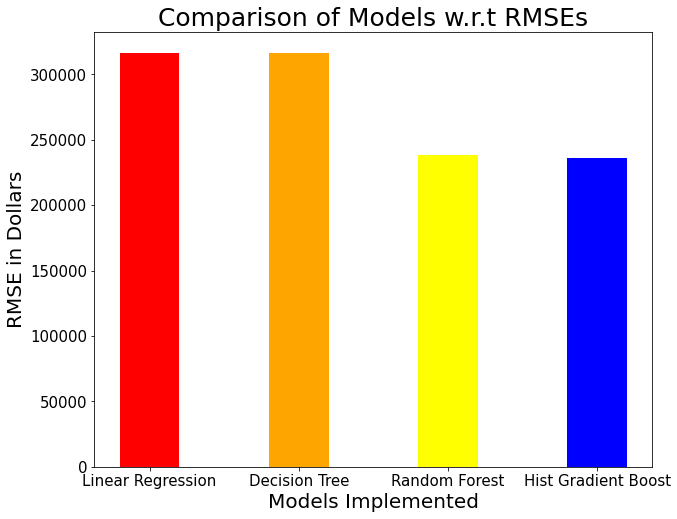

In [ ]:
rmses = {
    'Linear Regression': 316657.06804470805, 
    'Decision Tree': 316657.06804470805,
    'Random Forest': 238649.19228512188,
    'Hist Gradient Boost': 236315.338296568
    }

algos= list(rmses.keys())
values = list(rmses.values())
fig = plt.figure(figsize = (10,8))

colors = ['red', 'orange', 'yellow', 'blue']
plt.bar(algos, values, color = colors,
        width = 0.4)
plt.xlabel('Models Implemented', fontsize = 20)
plt.ylabel('RMSE in Dollars', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Comparison of Models w.r.t RMSEs', fontsize = 25)
plt.show()

From the comparison shown above, we can safely say that Histogram Gradient Boosting is the best model as compared to the other three. As the RMSE value of Histogram Gradient Boosting is the least, that shows that this model fits best.

We decided to pick Histogram Gradient Boosting for hyperparameter tuning and final use as the developed project model on our test data to get an accurate prediction.

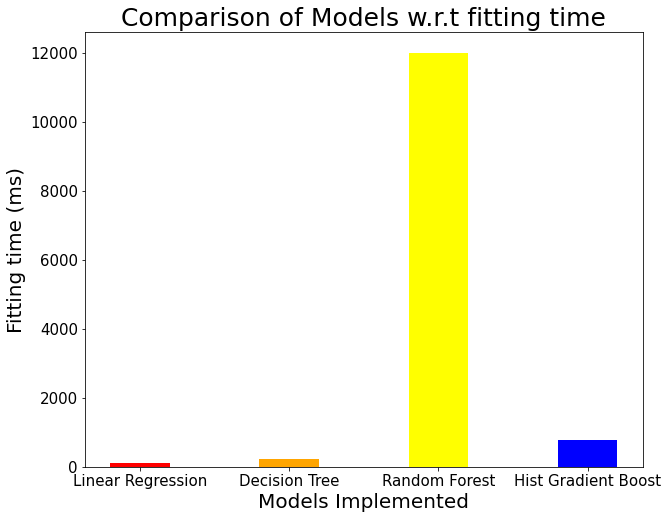

In [ ]:
timeit = {
    'Linear Regression': 99.1, 
    'Decision Tree': 238,
    'Random Forest': 12000,
    'Hist Gradient Boost': 769
    }

algos= list(timeit.keys())
values = list(timeit.values())
fig = plt.figure(figsize = (10,8))

colors = ['red', 'orange', 'yellow', 'blue']
plt.bar(algos, values, color = colors,
        width = 0.4)
plt.xlabel('Models Implemented', fontsize = 20)
plt.ylabel('Fitting time (ms)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Comparison of Models w.r.t fitting time', fontsize = 25)
plt.show()

### Voting and Stacking

In order to see if a combination of models fits the data better than a single model, we implement voting and stacking.  We check both RMSE and $R^2$ for each combination of all models except our linear regression.

In [ ]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(
    estimators=[
        ('hgb', hgb_reg),
        ('dt', tree_reg),
        ('rf', forest_reg)
    ]
)

voting_reg.fit(X_train, y_train)  

VotingRegressor(estimators=[('hgb',
                             Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['residential_units',
                                                                                'gross_square_feet',
                                                                                'year_built',
                                                                                'lat',
                                                                                'lng']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('cat...
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['residential_units',
                                                                                'gross_square_feet',
                                                                                'year_built',
                                                                                'lat',
                                                                                'lng']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('cat_encoder',
                                                                                                OneHotEncoder(sparse=False))]),
                                                                               ['borough',
                                                                                'tax_class_at_time_of_sale'])])),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]))])

In [ ]:
for name, reg in voting_reg.named_estimators_.items():
    print(name, "=", reg.score(X_train, y_train))

print(f'Them voting = {voting_reg.score(X_train, y_train)}')

hgb = 0.717591772460078
dt = 0.9823469364664953
rf = 0.9419017434198345
Them voting = 0.9282209633573647


In [ ]:
voting_rmse = -cross_val_score(voting_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)
hgb_rmse.mean()

236315.338296568

Voting seems to estimate `sale_price` as well as Histogram Gradient Boosting alone, but with a stronger $R^2$.

In [ ]:
from sklearn.ensemble import StackingRegressor

stacking_reg = StackingRegressor(  
    estimators=[
        ('hgb', hgb_reg),
        ('dt', tree_reg),
        ('rf', forest_reg)
    ], 
    final_estimator=RandomForestRegressor(random_state=42),
    cv=5  
)
stacking_reg.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('hgb',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(strategy='median')),
                                                                                                 ('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['residential_units',
                                                                                  'gross_square_feet',
                                                                                  'year_built',
                                                                                  'lat',
                                                                                  'lng']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(strategy='most_frequent')...
                                                                                 ['residential_units',
                                                                                  'gross_square_feet',
                                                                                  'year_built',
                                                                                  'lat',
                                                                                  'lng']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('cat_encoder',
                                                                                                  OneHotEncoder(sparse=False))]),
                                                                                 ['borough',
                                                                                  'tax_class_at_time_of_sale'])])),
                                               ('randomforestregressor',
                                                RandomForestRegressor(random_state=42))]))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [ ]:
print(f'Stacking the three = {stacking_reg.score(X_train, y_train)}')

Stacking the three = 0.779214502040833


In [ ]:
stacking_rmse = -cross_val_score(stacking_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)
stacking_rmse.mean()

245592.67465472865

Stacking on the other hand is not as accurate as Histogram Gradient Boosting, so we will stick with Histogram Gradient Boosting for the sake of interpretability.

## **5. Hyperparameter Tuning of Histogram Gradient Boosting Regressor**

After the first phase of our machine learning model implementation, we compared Linear Regression, Decision Tree, Random Forest, and Histogram Gradient Boosting in terms of their efficiency, execution time, and the most crucial factor- root mean square value.

In comparing the above mentioned models, we can safely say that Histogram Gradient Boosting performed the best among the four and hence is considered as the optimal model.

###Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocess_pipeline", preprocess_pipeline),
    ("hgb", HistGradientBoostingRegressor(random_state=42)),
])

param_grid = {'hgb__max_leaf_nodes': [2, 5, 10],
              'hgb__max_depth': [2, 5, 10],
              'hgb__min_samples_leaf': [2, 5, 10]}

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
%timeit (grid_search.fit(X_train, y_train))
grid_search.best_params_

28.5 s ± 1.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


{'hgb__max_depth': 10, 'hgb__max_leaf_nodes': 10, 'hgb__min_samples_leaf': 5}

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hgb__max_depth,param_hgb__max_leaf_nodes,param_hgb__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
25,0.37,0.01,0.07,0.01,10,10,5,"{'hgb__max_depth': 10, 'hgb__max_leaf_nodes': ...",-250257.46,-240859.86,-243304.89,-244807.40,3980.95,1
26,0.36,0.01,0.06,0.00,10,10,10,"{'hgb__max_depth': 10, 'hgb__max_leaf_nodes': ...",-250352.69,-241100.62,-243145.51,-244866.27,3968.29,2
24,0.36,0.00,0.06,0.00,10,10,2,"{'hgb__max_depth': 10, 'hgb__max_leaf_nodes': ...",-250467.65,-241665.35,-244190.82,-245441.27,3700.71,3
17,0.39,0.01,0.07,0.00,5,10,10,"{'hgb__max_depth': 5, 'hgb__max_leaf_nodes': 1...",-251511.72,-243053.68,-244814.41,-246459.94,3643.76,4
16,0.38,0.00,0.06,0.00,5,10,5,"{'hgb__max_depth': 5, 'hgb__max_leaf_nodes': 1...",-251834.94,-242913.55,-244833.51,-246527.34,3834.02,5


### Random Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'hgb__max_depth': randint(2, 100), 
    'hgb__max_leaf_nodes': randint(2, 100), 
    'hgb__min_samples_leaf': randint(2,100)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

%timeit (rnd_search.fit(X_train, y_train))

28.5 s ± 877 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
#check the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hgb__max_depth,param_hgb__max_leaf_nodes,param_hgb__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.22,0.09,0.08,0.01,53,94,16,"{'hgb__max_depth': 53, 'hgb__max_leaf_nodes': ...",-239385.16,-228332.62,-231249.20,-232988.99,4676.88,1
1,1.01,0.05,0.09,0.01,73,62,22,"{'hgb__max_depth': 73, 'hgb__max_leaf_nodes': ...",-239472.31,-229594.08,-231808.84,-233625.07,4232.33,2
8,0.93,0.07,0.08,0.00,77,59,23,"{'hgb__max_depth': 77, 'hgb__max_leaf_nodes': ...",-239656.28,-229726.63,-231546.80,-233643.24,4316.31,3
3,1.20,0.13,0.08,0.01,76,89,25,"{'hgb__max_depth': 76, 'hgb__max_leaf_nodes': ...",-240564.98,-229287.51,-232323.02,-234058.50,4764.75,4
2,1.36,0.02,0.12,0.00,84,88,76,"{'hgb__max_depth': 84, 'hgb__max_leaf_nodes': ...",-241881.67,-230445.06,-233901.21,-235409.31,4789.21,5


### Halving Random Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from scipy.stats import loguniform

param_distribs = {'hgb__max_depth': randint(2, 100), 
    'hgb__max_leaf_nodes': randint(2, 100), 
    'hgb__min_samples_leaf': randint(2,100)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

# This is where we switch to halving version ... 
halving_random_search = HalvingRandomSearchCV(full_pipeline, param_distribs, 
                                      n_candidates=20, cv=3, 
                                      min_resources='exhaust',
                                      scoring='neg_root_mean_squared_error', 
                                      random_state=69)


%timeit (halving_random_search.fit(X_train, y_train))
halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)

# and check the top few rows
halving_random_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

55.3 s ± 1.28 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


,iter,n_resources,param_hgb__max_depth,param_hgb__max_leaf_nodes,param_hgb__min_samples_leaf,mean_test_score
27,2,24768,72,71,78,-235824.61
29,2,24768,56,77,75,-235979.25
28,2,24768,18,95,85,-236132.95
26,1,8256,56,77,75,-242757.11
23,1,8256,18,95,85,-242916.95
22,1,8256,72,71,78,-242972.25
24,1,8256,37,45,88,-243242.48
21,1,8256,39,77,55,-243401.74
20,1,8256,16,23,51,-244147.60
25,1,8256,65,13,80,-246277.24


**Hyper-Parameter Tuning**

The combination of hyperparameters maximizes the model’s performance, minimizing a predefined loss function to produce better results with fewer errors.

**Grid Search:** It is an exhaustive search over specified parameter values for an estimator.

**Random Search:** Here, in contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

**Halving Random Search:** Search over specified parameter values with successive halving. The search strategy starts evaluating all the candidates with a small amount of resources and iteratively selects the best candidates, using more and more resources.

After implementing the above three models by hyperparameter tuning, we can now compare the three models and analyze them for the best analysis & conclusion.

We can see that the time taken to execute each of these vary in large amounts. Thereofre, execution time can be a very crucial factor to analze and choose the best model of the three. Randomized Search is the fastest and the most optimal of the three above.

*   Grid Search: 22.7s
*   Randomized Search: 20.6s
*   Halving Random Search: 41.4s

**We come to know that the best parameters are 53 for max_depth, 94 for max_leaf_nodes, and 16 for min_samples_leaf.**

The values of mean_test_score are:

*   Grid Search: -244807.40
*   Randomized Search: -232988.99
*   Halving Random Search: -235824.61

Thes above values are negative as a result of our scoring with "neg_root_mean_squared_error."



---



## **6. Final Model Evaluation**

In [ ]:
X_test = test_set.drop("sale_price", axis=1)  # dropping sale price for selecting the model
y_test = test_set["sale_price"].copy()  # using sale price for testing the model

In [ ]:
full_pipeline = Pipeline([
    ("preprocess_pipeline", preprocess_pipeline),
    ("hgb", HistGradientBoostingRegressor(max_depth = 53, max_leaf_nodes = 94, min_samples_leaf = 16, random_state = 42)),
])
hgb = HistGradientBoostingRegressor(max_depth = 53, max_leaf_nodes = 94, min_samples_leaf = 16, random_state = 42)
hgb_reg = make_pipeline(preprocess_pipeline, hgb)
hgb_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['residential_units',
                                                   'gross_square_feet',
                                                   'year_built', 'lat',
                                                   'lng']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(max_depth=53, max_leaf_nodes=94,
                                               min_samples_leaf=16,
                                               random_state=42))])

In [ ]:
housing_predictions_final = hgb_reg.predict(X_test)
final_rmse = mean_squared_error(y_test, housing_predictions_final,
                              squared=False)
final_rmse

233437.6438012095

In [ ]:
#to check the prediction of one unit, as an example
X_test_for_1_sample = X_test.loc[(X_test['gross_square_feet'] > 1700) & (X_test['gross_square_feet'] < 1900)  & (X_test['year_built']==1986)& (X_test['borough'] =='Staten Island') ]

# s = X_test_for_1_sample.replace({'lat': { 40.63:40.5920}, 'lng': {-74.11 : -74.071714}})
X_test_for_1_sample.head(1)



,borough,residential_units,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_date,lat,lng,log_sale_price
27059,Staten Island,1,1760,1986.00,1,2019Q3,40.63,-74.11,13.23


In [ ]:
#prediction price of one unit as an example
housing_predictions_final_for_1_sample = hgb_reg.predict(X_test_for_1_sample.head(1))
housing_predictions_final_for_1_sample

array([575136.26581446])

In [ ]:
final_r2 = r2_score(y_test, housing_predictions_final)
final_r2.mean()

0.6735734571681589



---



## **7. Conclusion**

In this project, we implemented multiple supervised machine learning models on a dataset pertaining to the New York City real estate industry. We wanted to predict the final sale price of residential units in NYC.

To do so, we analyzed various parameters, performed detailed data cleaning, split the dataset into train & test set, performed ML models, and finally performed hyperparameter tuning on the most efficient model to then make the model perform on the actual test set. We can conclude that:

*   Hist Gradient Boosting turned out to be the most effective ML model among the 4 implemented. It had the lowest RMSE value and hence was chosen for further tuning.

*   The final Histogram Gradient Boosting model fit the test set with a $R^2$ of **0.6736** and an RMSE of **$233,437.64**, making it a relatively good model.


*   For better visualization, we converted the given address, borough, block, etc. to a lat-long method to help visualize the location of different properties in NYC geographically. This both refined our dataset and added an interesting visual theme to our project.



---

